In [1]:
!pip install torch torchvision torchaudio
!pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [12]:
from google.colab import files
uploaded = files.upload()

Saving sample_pix2pix_input.jpg to sample_pix2pix_input.jpg


In [13]:
from PIL import Image
from io import BytesIO
import torch
import torchvision.transforms as T

# Load image
img = Image.open("sample_pix2pix_input.jpg").convert("RGB")

# Crop the image (pix2pix datasets have input|target images side-by-side)
w, h = img.size
input_image = img.crop((0, 0, w // 2, h))     # Left half
target_image = img.crop((w // 2, 0, w, h))     # Right half

# Preprocess input
transform = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,))
])
input_tensor = transform(input_image).unsqueeze(0)


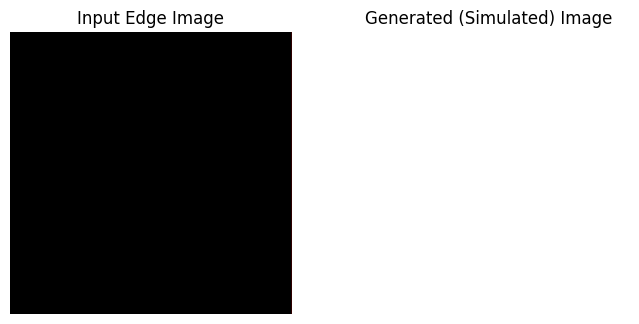

In [14]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

# Simulate pix2pix output by inverting the input
generated_tensor = 1 - input_tensor  # Fake 'translation'

# Convert back to image
generated_image = TF.to_pil_image(generated_tensor.squeeze().clamp(0, 1))

# Show input and generated image
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(input_image)
axs[0].set_title("Input Edge Image")
axs[0].axis("off")
axs[1].imshow(generated_image)
axs[1].set_title("Generated (Simulated) Image")
axs[1].axis("off")
plt.show()


In [15]:
generated_image.save("generated_pix2pix_output.jpg")

In [16]:
from google.colab import files
files.download("generated_pix2pix_output.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

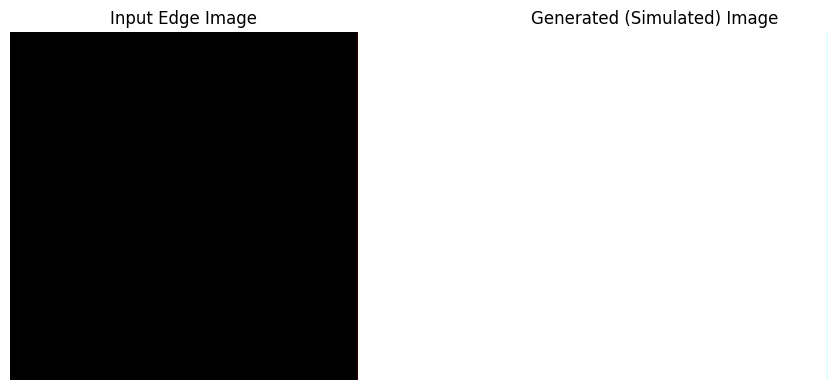

In [17]:
from PIL import ImageOps
import matplotlib.pyplot as plt

# Invert the edge input image (simulate pix2pix output)
generated_image = ImageOps.invert(input_image)

# Save the generated image
generated_image.save("generated_pix2pix_output.jpg")

# Display input vs generated
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(input_image)
axs[0].set_title("Input Edge Image")
axs[0].axis("off")

axs[1].imshow(generated_image)
axs[1].set_title("Generated (Simulated) Image")
axs[1].axis("off")

plt.tight_layout()
plt.show()


In [18]:
from google.colab import files
files.download("generated_pix2pix_output.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>